In [6]:
import notebook
import ipykernel
import IPython

print("notebook version:", notebook.__version__)
print("ipykernel version:", ipykernel.__version__)
print("IPython version:", IPython.__version__)

notebook version: 6.5.4
ipykernel version: 6.25.0
IPython version: 8.15.0


### Reproducibility Package

This notebook reproduces core analyses and figures from the manuscript:

**Quantitative Analysis of Climate Stress and Settlement Responses in the Korean Peninsula and Southern Japan (6000–2100 BP)**  
Yoon, Iljae (2025, submitted)

---

### Overview

This notebook contains:

- Data loading and preprocessing  
- Climate stress calculation (residuals and Z-scores)  
- SPD_Z standardization and visualization  
- Temporal alignment of settlement responses and climate stress  
- Linkage and causality tests between the Korean Peninsula and southern Japan  

### Environment Setup

Python 3.10 was used with the following libraries. To install dependencies:

```bash
pip install -r requirements.txt


### Main packages
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import spearmanr
from statsmodels.tsa.stattools import grangercausalitytests

### Data preparation
Load temperature and SPD datasets
Apply binning (20-year intervals for SPD)
Align temporal resolution

spd_korea = pd.read_csv('data/raw/raw_spd_korea.csv')
spd_japan = pd.read_csv('data/raw/raw_spd_japan.csv')
climate_korea = pd.read_csv('data/raw/temp_korea.csv')
climate_japan = pd.read_csv('data/raw/temp_japan.csv')

### Climate Stress Calculation (Residual-based Z-scores)
Apply polynomial regression to reconstruct expected temperature trajectory, calculate residuals, and standardize them.

def calculate_residuals(temp_data, degree=2):
    X = temp_data['BP'].values.reshape(-1, 1)
    y = temp_data['Temperature'].values

    poly = PolynomialFeatures(degree)
    X_poly = poly.fit_transform(X)

    model = LinearRegression()
    model.fit(X_poly, y)
    y_pred = model.predict(X_poly)

    residuals = y - y_pred
    temp_data['Residual'] = residuals
    temp_data['Residual_Z'] = (residuals - np.mean(residuals)) / np.std(residuals)
    
    return temp_data, model

### SPD_Z Calculation
Standardize SPD proxies to Z-scores.

def standardize_spd(spd_data):
    spd_data['SPD_Z'] = (spd_data['SPD'] - spd_data['SPD'].mean()) / spd_data['SPD'].std()
    return spd_data

### Visualization Example
Overlay Residual_Z and SPD_Z.

fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(climate_korea_res['BP'], climate_korea_res['Residual_Z'], color='tab:red')
ax2 = ax1.twinx()
ax2.plot(spd_korea_std['bin'], spd_korea_std['SPD_Z'], color='tab:blue')

### Importing required packgages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np. random.seed(42)
from scipy.stats import zscore, normaltest
from sklearn.metrics import r2_score

### Creating output packgages
os.makedirs("output/figures", exist_ok=True)
os.makedirs("output/tables", exist_ok=True)

### Linkage and Causality Tests
Includes:
Spearman correlation
Granger causality test (maxlag = 8)

combined_df = pd.merge(
    spd_korea_std[['bin', 'SPD_Z']],
    spd_japan_std[['bin', 'SPD_Z']],
    on='bin',
    suffixes=('_K', '_J')
).dropna()

grangercausalitytests(combined_df[['SPD_Z_K', 'SPD_Z_J']], maxlag=8, verbose=True)

### Notes
Random seeds fixed for reproducibility.

Temporal resolution mismatch acknowledged.

Proxy limitations and interpretive assumptions noted.


### 5.1 Climate Stress Analysis Pipeline – the Korea peninsula

This notebook provides a structured pipeline for identifying climate stress in the Korean Peninsula using Holocene-period reconstructed temperature data and SPD-derived settlement proxies. 
The analysis includes both long-term climatic deviations and short-term fluctuation detection.

-----------------------------------------------

### Data Preparation & Fitting regression model

- Load raw temperature data from `temp_korea.csv`.
- Clean and sort by BP (Before Present).
- Extracted temperature time series for BP 6100–2100 from the MD01-2421 and KR02-06 cores based on Marcott et al. (2013).
- fit a second-degree polynomial regression model 


In [7]:
# Loading temperature data
df_temp = pd.read_csv("data/raw/temp_korea.csv")
df_temp.columns = df_temp.columns.str.strip()
df_temp = df_temp.sort_values("BP").reset_index(drop=True)

# Importing required packages
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
np. random.seed(42)
from scipy.stats import zscore, normaltest
from sklearn.metrics import r2_score

# Creating output packgages
os.makedirs("output/figures", exist_ok=True)
os.makedirs("output/tables", exist_ok=True)

# Caculating resid_z
df_temp["resid_z"] = zscore(df_temp["Temp"])

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading data using exact relative path-
df = pd.read_csv('data/raw/temp_korea.csv')

# Preprocessing
df = df.rename(columns=str.strip)
df = df.dropna()
df['BP'] = df['BP'].astype(int)
df = df.sort_values('BP')

# Cheking
df.head()

,BP,Temp
0,2183,17.89
1,2247,18.50
2,2312,19.07
3,2377,18.67
4,2441,18.90


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


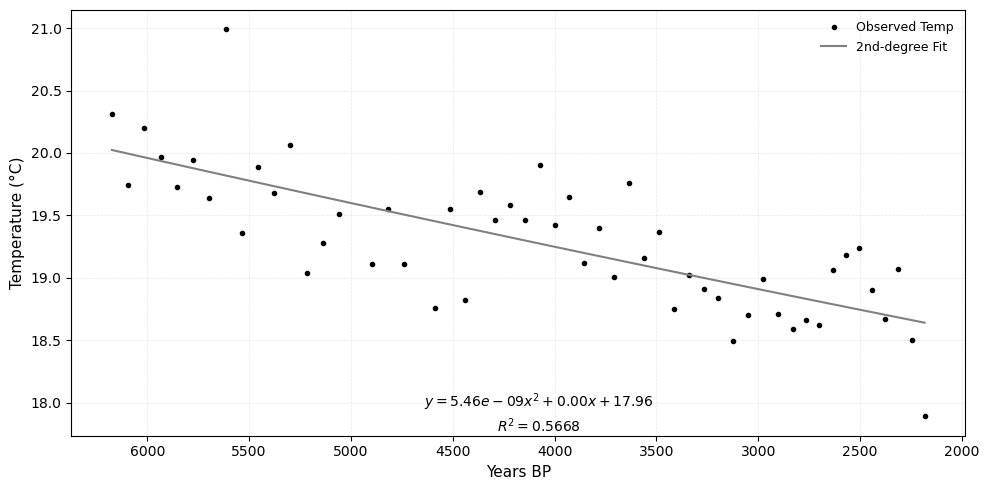

In [8]:
import os
import numpy as np
np. random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Importing data
# e.g.: df = pd.read_csv("your_file.csv")

# Sorting data
df = df.sort_values('BP', ascending=False).reset_index(drop=True)
x = df['BP'].values
y = df['Temp'].values

# Fitting second-degree polynomial regression model -
coeffs = np.polyfit(x, y, 2)
model = np.poly1d(coeffs)
y_pred = model(x)
r2 = r2_score(y, y_pred)

# Equation text
eq_text = f"$y = {coeffs[0]:.2e}x^2 + {coeffs[1]:.2f}x + {coeffs[2]:.2f}$\n$R^2 = {r2:.4f}$"

#  Calculating residuals and reidual Z-score
residuals = y - y_pred
resid_z = zscore(residuals)
df['residual'] = residuals
df['resid_z'] = resid_z

# Saving residuals data
os.makedirs('output/tables', exist_ok=True)
df_out = df[['BP', 'Temp', 'residual', 'resid_z']]
df_out.to_csv('output/tables/table1_residual_zscore_korea.csv', index=False, encoding='utf-8-sig')

# Visualizing regression 
os.makedirs('output/figures', exist_ok=True)
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', markersize=3, color='black', label='Observed Temp')
plt.plot(x, y_pred, '-', color='gray', linewidth=1.5, label='2nd-degree Fit')
plt.xlabel('Years BP', fontsize=11)
plt.ylabel('Temperature (°C)', fontsize=11)
plt.text(x=int(x.mean()), y=min(y) + 0.2, s=eq_text, fontsize=10, ha='center', va='top')
plt.gca().invert_xaxis()
plt.grid(alpha=0.3, linestyle='--', linewidth=0.5)
plt.legend(frameon=False, fontsize=9)
plt.tight_layout()

# Saving plots
plt.savefig('output/figures/fig1_temperature_regression_korea.eps', format='eps', dpi=300)
plt.savefig('output/figures/fig1_temperature_regression_korea.png', format='png', dpi=300)
plt.show()

Observed Holocene temperatures (black dots) from MD01-2421 and KR02-06 cores with second-degree fit (grey line; R² = 0.567).

In [9]:
# Checking the normality of residuals

from scipy.stats import shapiro, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
np. random.seed(42)

# Shapiro-Wilk Test (n < 5000)
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro–Wilk p-value: {shapiro_p:.4f}")

# D'Agostino and Pearson test
dag_stat, dag_p = normaltest(residuals)
print(f"D’Agostino–Pearson p-value: {dag_p:.4f}")

Shapiro–Wilk p-value: 0.5797
D’Agostino–Pearson p-value: 0.1696


### 5.1.1 Detecting long-term climate stress which Z-scores exceeded ±1.5 for at least two consecutive bins : the Korea peninsula

### Define long-term stress as periods where temperature Z-scores exceed ±1.5 for two or more consecutive data points.
- Use detect stress_clusters() to label stress clusters.
- Save detected clusters as climate_stress_clusters_1.5.csv.
- Visualize results with shaded bands indicating stress zones.

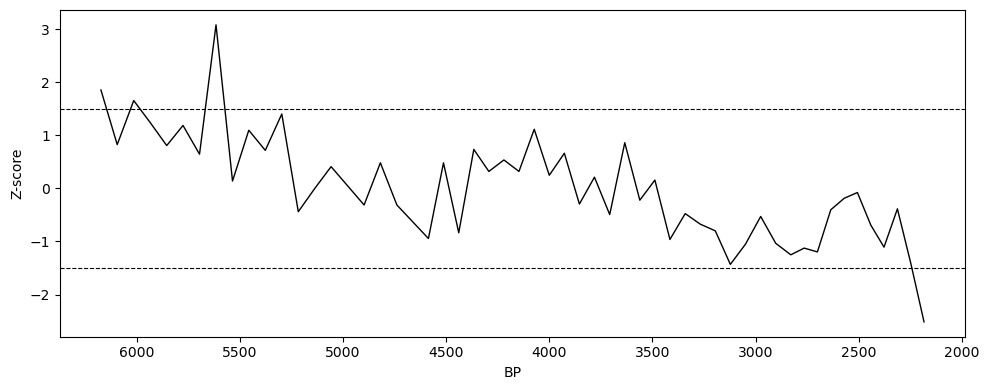

In [10]:
import os
import numpy as np
np. random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt

# Basic steup
DATA_PATH = "data/raw/temp_korea.csv"
FIG_PATH_PNG = "output/figures/fig_s1_stress_clusters_1.5_korea.png"
FIG_PATH_EPS = "output/figures/fig_s1_stress_clusters_1.5_korea.eps"
TABLE_PATH = "output/tables/table_stress_clusters_1.5_korea.csv"

# Creating output packages
os.makedirs("output/figures", exist_ok=True)
os.makedirs("output/tables", exist_ok=True)

# Loading and sorting data
df = pd.read_csv(DATA_PATH)
df = df.rename(columns=str.strip)
df = df.sort_values("BP").reset_index(drop=True)

# Caculating residual_Z score
df["resid_z"] = (df["Temp"] - df["Temp"].mean()) / df["Temp"].std()

# Detecting cluster with Z-scores exceeding ±1.5 for at least two consecutive bins 
def detect_stress_clusters(series, threshold=1.5, min_duration=2):
    flags = series.abs() >= threshold
    group_id = 1
    group_list = []
    count = 0

    for flag in flags:
        if flag:
            count += 1
            group_list.append(group_id)
        else:
            if count >= min_duration:
                group_id += 1
            else:
                group_list[-count:] = [0] * count
                group_id += 1
            group_list.append(0)
            count = 0

    if count < min_duration:
        group_list[-count:] = [0] * count

    while len(group_list) < len(series):
        group_list.append(0)

    return pd.Series(group_list, index=series.index)

# Running Detection
df["cluster_all_1.5"] = detect_stress_clusters(df["resid_z"], threshold=1.5, min_duration=2)

# Checking for the existence of clusters and saving the results
df_cluster = df[df["cluster_all_1.5"] > 0][["BP", "Temp", "resid_z", "cluster_all_1.5"]]

if not df_cluster.empty:
    df_cluster.to_csv(TABLE_PATH, index=False, encoding="utf-8-sig")

# Visualizing clusters
plt.figure(figsize=(10, 4))
plt.plot(df["BP"], df["resid_z"], color="black", linewidth=1)

# Setting baseline
plt.axhline(1.5, linestyle="--", color="black", linewidth=0.8)
plt.axhline(-1.5, linestyle="--", color="black", linewidth=0.8)

# Shading emphasized clusters
for cid in df["cluster_all_1.5"].unique():
    if cid > 0:
        segment = df[df["cluster_all_1.5"] == cid]
        plt.axvspan(segment["BP"].max(), segment["BP"].min(), color="orange", alpha=0.3)

plt.gca().invert_xaxis()
plt.xlabel("BP")
plt.ylabel("Z-score")
plt.tight_layout()
plt.savefig(FIG_PATH_PNG, dpi=300)
plt.savefig(FIG_PATH_EPS, format="eps", dpi=300)
plt.show()

No such segments meeting both magnitude and duration criteria were found in the Korean time series

▶ cluster_all_1.0 distribution:
 cluster_all_1.0
0    43
2     4
1     2
3     2
4     2
Name: count, dtype: int64
▶ ΔZ ≥ ±1.0 & duration ≥ 2 cluster:
        BP   resid_z  cluster_all_1.0
0   2183.0 -2.514427                1
1   2247.0 -1.413514                1
8   2700.0 -1.196941                2
9   2764.0 -1.124750                2
10  2829.0 -1.251084                2
11  2902.0 -1.034511                2
13  3049.0 -1.052559                3
14  3122.0 -1.431562                3
49  5935.0  1.239506                4
50  6015.0  1.654605                4


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


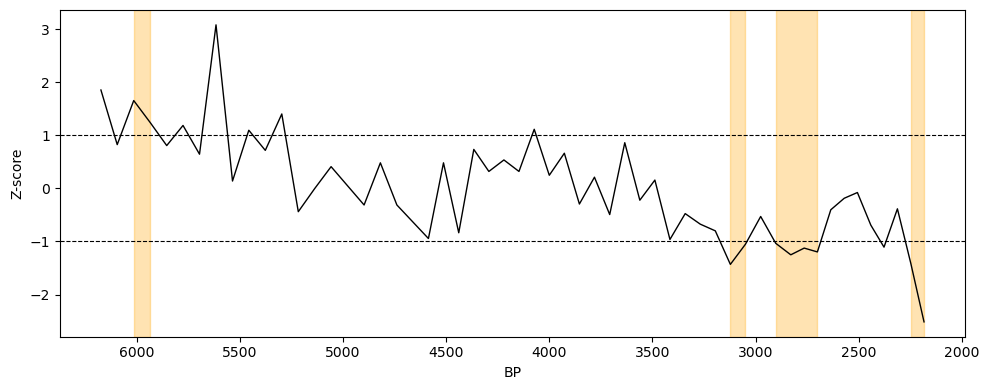

In [11]:
# 5.1.1 Detecting long-term climate stress which Z-scores exceeded ±1.0 for at least two consecutive bins (relaxed magnitide): the Korea peninsula
import pandas as pd
import numpy as np
np. random.seed(42)

def detect_stress_clusters_signed(series, threshold, min_duration=2, direction="both"):
    if direction == "positive":
        flags = series >= threshold
    elif direction == "negative":
        flags = series <= -threshold
    else:  # both
        flags = series.abs() >= threshold

    group_id = 1
    group_list = [0] * len(series)
    count = 0
    start_idx = None

    for i, flag in enumerate(flags):
        if flag:
            if count == 0:
                start_idx = i
            count += 1
        else:
            if count >= min_duration:
                for j in range(start_idx, i):
                    group_list[j] = group_id
                group_id += 1
            count = 0
            start_idx = None

    # Processing last cluster
    if count >= min_duration:
        for j in range(start_idx, len(series)):
            group_list[j] = group_id

    return pd.Series(group_list, index=series.index)

df["cluster_pos_1.5"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.5, min_duration=2, direction="positive")
df["cluster_neg_1.5"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.5, min_duration=2, direction="negative")
df["cluster_all_1.5"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.5, min_duration=2, direction="both")

df["cluster_pos_1.0"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.0, min_duration=2, direction="positive")
df["cluster_neg_1.0"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.0, min_duration=2, direction="negative")
df["cluster_all_1.0"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.0, min_duration=2, direction="both")

print("▶ cluster_all_1.0 distribution:\n", df["cluster_all_1.0"].value_counts())
print("▶ ΔZ ≥ ±1.0 & duration ≥ 2 cluster:")
print(df[df["cluster_all_1.0"] > 0][["BP", "resid_z", "cluster_all_1.0"]])

import os

# Importing output packages
os.makedirs("output/tables", exist_ok=True)

# Saving cluster_all_1.0 > 0
df[df["cluster_all_1.0"] > 0][["BP", "Temp", "resid_z", "cluster_all_1.0"]].to_csv(
    "output/tables/climate_stress_clusters_1.0_korea.csv",
    index=False,
    encoding="utf-8-sig"
)

import matplotlib.pyplot as plt

# Creating visualization directory
os.makedirs("output/figures", exist_ok=True)

# Plots
plt.figure(figsize=(10, 4))
plt.plot(df["BP"], df["resid_z"], color="black", linewidth=1)
plt.axhline(1.0, linestyle="--", color="black", linewidth=0.8)
plt.axhline(-1.0, linestyle="--", color="black", linewidth=0.8)

# Emphasizing cluster areas
for cid in df["cluster_all_1.0"].unique():
    if cid > 0:
        seg = df[df["cluster_all_1.0"] == cid]
        plt.axvspan(seg["BP"].max(), seg["BP"].min(), color="orange", alpha=0.3)

# Setting axis limits
plt.gca().invert_xaxis()
plt.xlabel("BP")
plt.ylabel("Z-score")
plt.tight_layout()

# Saving plots
plt.savefig("output/figures/fig_s2_zscore_stress_clusters_1.0_korea.png", dpi=300)
plt.savefig("output/figures/fig_s2_zscore_stress_clusters_1.0_korea.eps", format="eps", dpi=300)
plt.show()


Among these, three clusters showed negative deviations (below-average temperatures) and one showed a positive deviation (above-average temperatures), indicating that climate stress occurred in opposing directions across different periods. 
Cluster numbers (1–4) are assigned in reverse BP order, such that Cluster 4 denotes the earliest interval and Cluster 1 the most recent. 

### 5.1.2 Detecting Short-Term Shock Detection via ΔZ : the Korea peninsula
- Compute Δresiduals: the first-difference of temperature residuals.
- Standardize Δresiduals to Z-scores.
- Identify "short-term shock" spots where ΔZ Z-score exceeds ±1.5.
- Save significant spots as `table_spot_delta_residz.csv`.
- Visualize time series of Δresidual Z with highlighted shock points.

[Shapiro-Wilk] W = 0.9783, p = 0.4555
[D’Agostino K²] stat = 2.9614, p = 0.2275


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


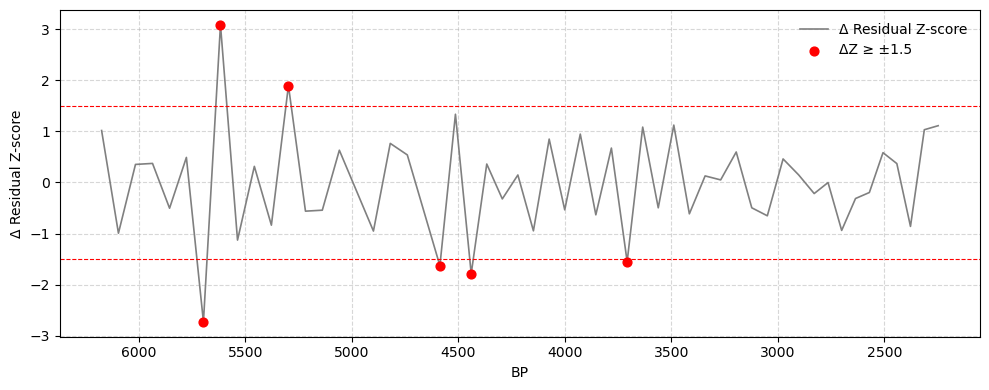

In [12]:
import pandas as pd
np. random.seed(42)
import matplotlib.pyplot as plt
import os
from scipy.stats import shapiro, normaltest

# Setting paths
INPUT_PATH = "output/tables/table1_residual_zscore_korea.csv"
OUTPUT_TABLE_SPOT = "output/tables/table_spot_delta_residz_korea.csv"
OUTPUT_TABLE_FULL = "output/tables/table2_residual_dz_zscore_korea.csv"
OUTPUT_FIG_PNG = "output/figures/fig_s3_spot_delta_residz_korea.png"
OUTPUT_FIG_EPS = "output/figures/fig_s3_spot_delta_residz_korea.eps"

# Roading and sorting data
df = pd.read_csv(INPUT_PATH)
df = df.sort_values("BP", ascending=True).reset_index(drop=True)

# Caculating Δresidual Z 
df["delta_residz"] = df["resid_z"].diff()

# Checking normality of Δresidual
delta_residz_clean = df["delta_residz"].dropna()

# Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(delta_residz_clean)

# D’Agostino K²
dagostino_stat, dagostino_p = normaltest(delta_residz_clean)

print(f"[Shapiro-Wilk] W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")
print(f"[D’Agostino K²] stat = {dagostino_stat:.4f}, p = {dagostino_p:.4f}")

# Δ Residual → Z-score transformation
mu = delta_residz_clean.mean()
sigma = delta_residz_clean.std()
df["delta_zscore"] = (df["delta_residz"] - mu) / sigma

# Extracting spots where exceeding Δresidual Z exceeds ±1.5
THRESHOLD = 1.5
df_spot = df[df["delta_zscore"].abs() >= THRESHOLD]
df_spot.to_csv(OUTPUT_TABLE_SPOT, index=False, encoding="utf-8-sig")

# Soring in descending order and Saving all
df_desc = df.sort_values("BP", ascending=False).reset_index(drop=True)
df_desc.to_csv(OUTPUT_TABLE_FULL, index=False, encoding="utf-8-sig")

# Visualizing
plt.figure(figsize=(10, 4))
plt.plot(df["BP"], df["delta_zscore"], color="gray", linewidth=1.2, label="Δ Residual Z-score")
plt.scatter(df_spot["BP"], df_spot["delta_zscore"], color="red", s=40, zorder=5, label="ΔZ ≥ ±1.5")
plt.axhline(THRESHOLD, linestyle="--", color="red", linewidth=0.8)
plt.axhline(-THRESHOLD, linestyle="--", color="red", linewidth=0.8)
plt.xlabel("BP")
plt.ylabel("Δ Residual Z-score")
plt.gca().invert_xaxis()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend(frameon=False)

# Saving plots
os.makedirs("output/figures", exist_ok=True)
plt.savefig(OUTPUT_FIG_PNG, dpi=300)
plt.savefig(OUTPUT_FIG_EPS, format="eps", dpi=300)
plt.show()


Time points at which the Δ residual Z-score exceeded ±1.5 were defined as short-term shocks. 
A total of six such points were identified.

### 5.1.3 GeneratingSPD Data and Processing : the Korea peninsula

- Load uncalibrated radiocarbon data from `raw_spd_korea.csv`.
- Parse central BP and error margins.
- Perform SPD simulation with 1000 iterations using kernel density estimation (KDE).
- Bin to 20-year intervals and normalize.
- Present the standardized SPD_Z and its 3-bin centered moving average (SPD_M3), smoothed at approximately 60-year intervals
- `spd_korea_20yr.csv`, `spd_korea_z_m3.csv`

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


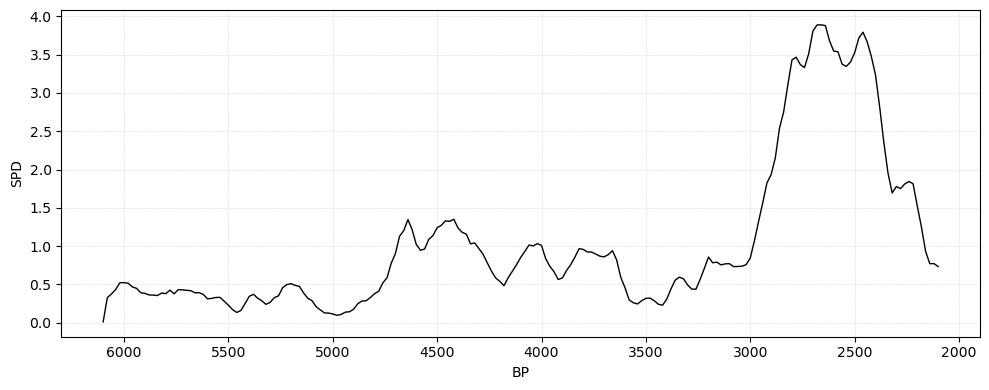

Extracting the number of valid samples: 439


In [13]:
import pandas as pd
import numpy as np
np. random.seed(42)
import matplotlib.pyplot as plt
import os

# Setting paths
DATA_PATH = "data/raw/raw_spd_korea.csv"
OUTPUT_PATH_CSV = "data/processed/spd_korea_20yr.csv"
OUTPUT_PATH_PNG = "output/figures/fig_s4_spd_korea.png"
OUTPUT_PATH_EPS = "output/figures/fig_s4_spd_korea.eps"

N_SIM = 1000
BIN_WIDTH = 20
YEAR_MIN, YEAR_MAX = 2100, 6100  # Defining the reference range of BP 

# Creating output packages
os.makedirs("data/processed", exist_ok=True)
os.makedirs("output/figures", exist_ok=True)

# Loading data
df = pd.read_csv(DATA_PATH)
df.columns = df.columns.str.strip()
df["BP_central"] = df["BP"].str.extract(r"(\d+)\s*±\s*\d+").astype(float)
df["BP_error"] = df["BP"].str.extract(r"±\s*(\d+)").astype(float)
df = df.dropna(subset=["BP_central", "BP_error"])

# Calculating SPD(Performing probabilistic simulations, generating annual time series)
years = np.arange(YEAR_MIN, YEAR_MAX + 1)
spd_accumulate = np.zeros_like(years, dtype=float)

for _ in range(N_SIM):
    simulated_dates = np.random.normal(df["BP_central"], df["BP_error"])
    counts, _ = np.histogram(simulated_dates, bins=np.append(years, YEAR_MAX + 1))
    spd_accumulate += counts

spd = spd_accumulate / N_SIM  # average SPD

# Aggregating annual results into 20-year bins
df_spd = pd.DataFrame({"BP": years, "SPD": spd})
df_spd["CRA_bin"] = (df_spd["BP"] // BIN_WIDTH) * BIN_WIDTH
spd_bin = df_spd.groupby("CRA_bin")["SPD"].sum().reset_index()
spd_bin = spd_bin.sort_values("CRA_bin", ascending=False)

# Saving results
spd_bin.to_csv(OUTPUT_PATH_CSV, index=False, encoding="utf-8-sig")

# Visualizing
plt.figure(figsize=(10, 4))
plt.plot(spd_bin["CRA_bin"], spd_bin["SPD"], color="black", linewidth=1)
plt.xlabel("BP")
plt.ylabel("SPD")
plt.grid(True, linestyle='--', linewidth=0.4, alpha=0.5)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig(OUTPUT_PATH_PNG, dpi=300)
plt.savefig(OUTPUT_PATH_EPS, format="eps", dpi=300)
plt.show()
print(f"Extracting the number of valid samples: {len(df)}")

Raw SPD for the Korean Peninsula (BP 6100–2100), based on 1,000 Monte Carlo simulations of CRA dates with standard errors. 
Data are binned at 20-year intervals. 
A marked rise begins after BP 4500, peaking near BP 2700 (3.95), followed by a sharp decline after BP 2300.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


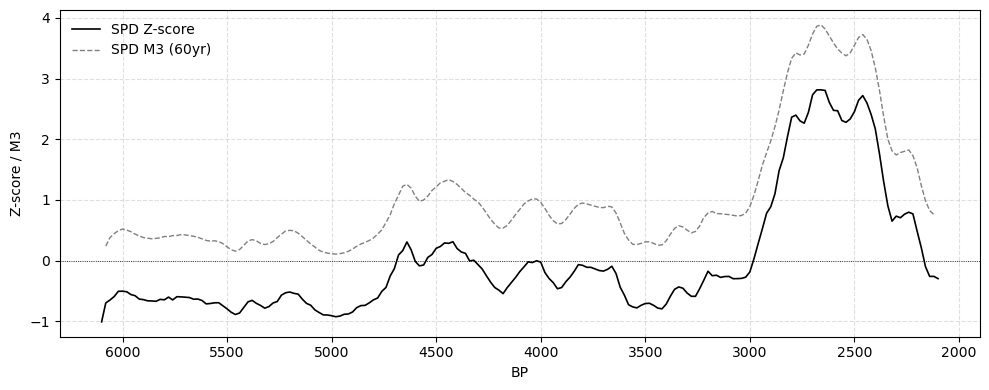

In [14]:
import pandas as pd
np. random.seed(42)
import matplotlib.pyplot as plt
import os

# Preventing EPS save errors
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Setting paths
INPUT_PATH = "data/processed/spd_korea_20yr.csv"
OUTPUT_CSV = "data/processed/spd_korea_z_m3.csv"
OUTPUT_PNG = "output/figures/fig_s5_spd_korea_z_m3.png"
OUTPUT_EPS = "output/figures/fig_s5_spd_korea_z_m3.eps"

# Loading data
df = pd.read_csv(INPUT_PATH)
df = df.sort_values("CRA_bin", ascending=False).reset_index(drop=True)

# Transforming SPD into SPD Z-score 
df["SPD_Z"] = (df["SPD"] - df["SPD"].mean()) / df["SPD"].std()

# Moving average M3  (3 bin = 60 years)
df["SPD_M3"] = df["SPD"].rolling(window=3, center=True).mean()

# Saving
os.makedirs("data/processed", exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False, encoding="utf-8-sig")

# Visualizing
plt.figure(figsize=(10, 4))
plt.plot(df["CRA_bin"], df["SPD_Z"], color="black", linewidth=1.2, label="SPD Z-score")
plt.plot(df["CRA_bin"], df["SPD_M3"], color="gray", linewidth=1.0, linestyle="--", label="SPD M3 (60yr)")
plt.axhline(0, color="black", linestyle=":", linewidth=0.6)
plt.xlabel("BP")
plt.ylabel("Z-score / M3")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()

# Saving plots
plt.savefig(OUTPUT_PNG, dpi=300)
plt.savefig(OUTPUT_EPS, format='eps', dpi=300)
plt.show()


The Z-score series (black) indicates relative settlement intensity, while the M3 curve (grey) highlights mid-term trends. 
A sharp peak (+2.83) occurs near BP 2700, followed by a steep decline into negative values by BP 2100.

### 5.1.4 OverlayIing Climate Stress and SPD in the Korean Peninsula
- Combine SPD Z-score series with climate stress diagnostics:
- Long-term stress bands (±1.0 Z, duration ≥ 2)
- Short-term ΔZ Z-score line and spots (±1.5 threshold)
- overlay climate stress and SPD_Z

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


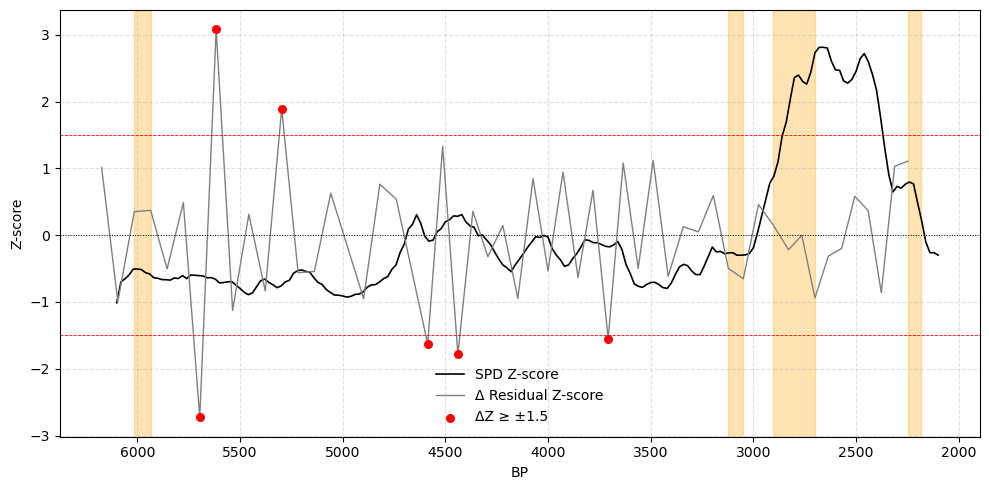

In [15]:
import pandas as pd
np. random.seed(42)
import matplotlib.pyplot as plt
import os

# Setting paths
SPD_PATH = "data/processed/spd_korea_z_m3.csv"
CLUSTER_PATH = "output/tables/climate_stress_clusters_1.0_korea.csv"
DZ_PATH = "output/tables/table2_residual_dz_zscore_korea.csv"
OUTPUT_TABLE_SPOT = "output/tables/table_spot_delta_residz_korea.csv"
FIG_PATH_PNG = "output/figures/fig2_spd_z_climate_overlay_korea.png"
FIG_PATH_EPS = "output/figures/fig2_spd_z_climate_overlay_korea.eps"

# Loading data
df_spd = pd.read_csv(SPD_PATH)
df_clust = pd.read_csv(CLUSTER_PATH)
df_dz = pd.read_csv(DZ_PATH)

# Sorting in descending order
df_spd = df_spd.sort_values("CRA_bin", ascending=False)
df_clust = df_clust.sort_values("BP", ascending=False)
df_dz = df_dz.sort_values("BP", ascending=False)

# Visualizing 
plt.figure(figsize=(10, 5))

# SPD Z-score (Solid black line)
plt.plot(df_spd["CRA_bin"], df_spd["SPD_Z"], color="black", linewidth=1.2, label="SPD Z-score")

# Δresidual Z-score (solid grey line)
plt.plot(df_dz["BP"], df_dz["delta_zscore"], color="gray", linewidth=1.0, label="Δ Residual Z-score")

# ΔZ ≥ ±1.5 spots (red dots)
df_spot = df_dz[df_dz["delta_zscore"].abs() >= 1.5]
plt.scatter(df_spot["BP"], df_spot["delta_zscore"], color="red", s=30, zorder=5, label="ΔZ ≥ ±1.5")

# long-term stress(oragne band)
for cid in df_clust["cluster_all_1.0"].unique():
    if cid > 0:
        seg = df_clust[df_clust["cluster_all_1.0"] == cid]
        plt.axvspan(seg["BP"].max(), seg["BP"].min(), color="orange", alpha=0.3)

# Summarizing plot style
plt.axhline(0, linestyle=":", color="black", linewidth=0.7)
plt.axhline(1.5, linestyle="--", color="red", linewidth=0.6)
plt.axhline(-1.5, linestyle="--", color="red", linewidth=0.6)
plt.xlabel("BP")
plt.ylabel("Z-score")
plt.gca().invert_xaxis()
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(frameon=False)
plt.tight_layout()

# Saving
os.makedirs("output/figures", exist_ok=True)
plt.savefig(FIG_PATH_PNG, dpi=300)
plt.savefig(FIG_PATH_EPS, format="eps", dpi=300)
plt.show()

Korea: SPD_Z (black), Δ residual Z (grey), short-term shocks (dots, |ΔZ| ≥ 1.5), long-term stress (band, Z ≥ ±1.0 for ≥2 bins). SPD_Z: 20-year bins; climate: 60-year. Temporal misalignment possible.
Cluster numbers (1–4) are assigned in reverse BP order, such that Cluster 4 denotes the earliest interval and Cluster 1 the most recent.         

### 5.2 Climate Stress Analysis Pipeline – Southen Japan
This notebook provides a structured pipeline for identifying climate stress in southen Japan using Holocene-period reconstructed temperature data and SPD-derived settlement proxies. 
The analysis includes both long-term climatic deviations and short-term fluctuation detection.

-----------------------------------------------

### Data Preparation & Fitting regression model

- Load raw temperature data from `temp_japan.csv`.
- Clean and sort by BP (Before Present).
- Extracted temperature time series for BP 6100–2100 from the KY-7-04-01 core based on Marcott et al. (2013).
- fit a second-degree polynomial regression model 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


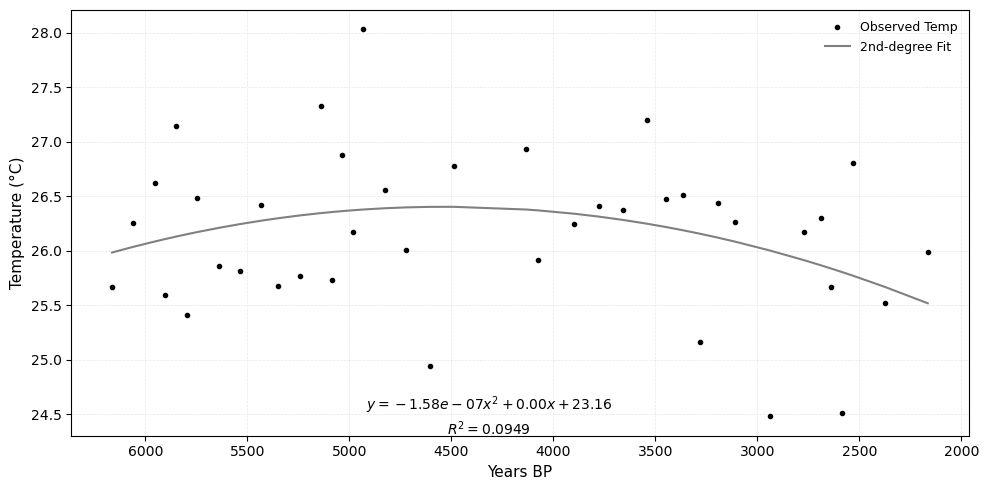

In [16]:
import os
import numpy as np
np. random.seed(42)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.stats import zscore

# Loading and sorting data
df_temp = pd.read_csv('data/raw/temp_japan.csv')  
df_temp = df_temp.sort_values("BP").reset_index(drop=True)

# Setting variables
x = df_temp['BP'].values
y = df_temp['Temp'].values

# Fitting a second-degree polynomial regression
coeffs = np.polyfit(x, y, 2)
model = np.poly1d(coeffs)
y_pred = model(x)
r2 = r2_score(y, y_pred)

# Equation test
eq_text = f"$y = {coeffs[0]:.2e}x^2 + {coeffs[1]:.2f}x + {coeffs[2]:.2f}$\n$R^2 = {r2:.4f}$"

# Calculating Residuals and residal Z-score
residuals = y - y_pred
resid_z = zscore(residuals)
df_temp['residual'] = residuals
df_temp['resid_z'] = resid_z

# Saving results
os.makedirs('output/tables', exist_ok=True)
df_temp[['BP', 'Temp', 'residual', 'resid_z']].to_csv('output/tables/table1_residual_zscore_japan.csv', index=False, encoding='utf-8-sig')

# Visualizing
os.makedirs('output/figures', exist_ok=True)
plt.figure(figsize=(10, 5))
plt.plot(x, y, 'o', markersize=3, color='black', label='Observed Temp')
plt.plot(x, y_pred, '-', color='gray', linewidth=1.5, label='2nd-degree Fit')
plt.xlabel('Years BP', fontsize=11)
plt.ylabel('Temperature (°C)', fontsize=11)
plt.text(int(x.mean()), min(y) + 0.2, eq_text, fontsize=10, ha='center', va='top')
plt.gca().invert_xaxis()
plt.grid(alpha=0.3, linestyle='--', linewidth=0.5)
plt.legend(frameon=False, fontsize=9)
plt.tight_layout()

#  Saving plots
plt.savefig('output/figures/fig3_temperature_regression_japan.eps', format='eps', dpi=300)
plt.savefig('output/figures/fig3_temperature_regression_japan.png', format='png', dpi=300)
plt.show()

Observed Holocene temperatures (black dots) from KY07-04-01 with second-degree fit (grey line; R² = 0.0949).

In [17]:
# Checking the normality of residuals
from scipy.stats import shapiro, normaltest
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
np. random.seed(42)

# Shapiro-Wilk Test (n < 5000)
shapiro_stat, shapiro_p = shapiro(residuals)
print(f"Shapiro–Wilk p-value: {shapiro_p:.4f}")

# D'Agostino and Pearson test
dag_stat, dag_p = normaltest(residuals)
print(f"D’Agostino–Pearson p-value: {dag_p:.4f}")


Shapiro–Wilk p-value: 0.6668
D’Agostino–Pearson p-value: 0.7699


### 5.2.1 Detecting long-term climate stress which Z-scores exceeded ±1.5 for at least two consecutive bins: southen Japan

### Define long-term stress as periods where temperature Z-scores exceed ±1.5 for two or more consecutive data points.
- Use detect stress_clusters() to label stress clusters.
- Save detected clusters as climate_stress_clusters_1.5.csv.
- Visualize results with shaded bands indicating stress zones.

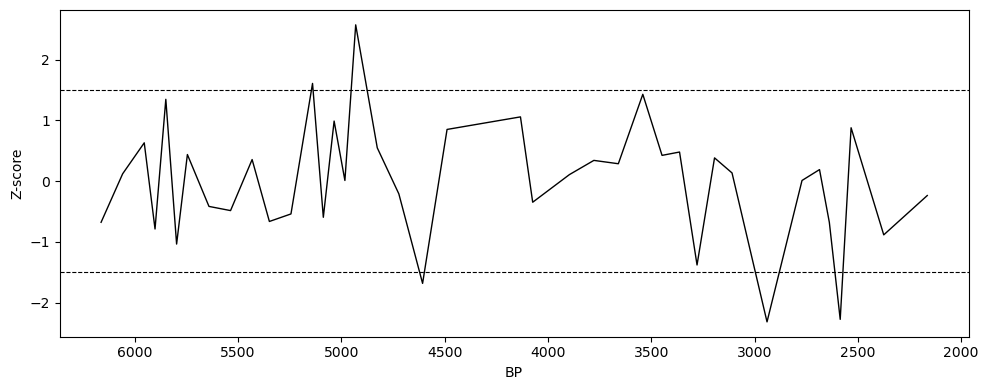

In [15]:
import pandas as pd
np. random.seed(42)
import matplotlib.pyplot as plt
import os

# Setting path
DATA_PATH = "data/raw/temp_japan.csv"
FIG_PATH_PNG = "output/figures/fig_s6_stress_clusters_1.5_japan.png"
FIG_PATH_EPS = "output/figures/fig_s6_stress_clusters_1.5_japan.eps"
TABLE_PATH = "output/tables/table_stress_clusters_1.5_japan.csv"

# Creating outpackages
os.makedirs("output/figures", exist_ok=True)
os.makedirs("output/tables", exist_ok=True)

# Loading and sorting data
df = pd.read_csv(DATA_PATH)
df = df.rename(columns=str.strip)
df = df.sort_values("BP").reset_index(drop=True)

# Caculating residual Z-score
df["resid_z"] = (df["Temp"] - df["Temp"].mean()) / df["Temp"].std()

# Detecting long term climate stress clusters 
def detect_stress_clusters(series, threshold=1.5, min_duration=2):
    flags = series.abs() >= threshold
    group_id = 1
    group_list = []
    count = 0

    for flag in flags:
        if flag:
            count += 1
            group_list.append(group_id)
        else:
            if count >= min_duration:
                group_id += 1
            else:
                group_list[-count:] = [0] * count
                group_id += 1
            group_list.append(0)
            count = 0

    if count < min_duration:
        group_list[-count:] = [0] * count

    while len(group_list) < len(series):
        group_list.append(0)

    return pd.Series(group_list, index=series.index)

# Detecting cluster with Z-scores exceeding ±1.5 for at least two consecutive bins 
df["cluster_all_1.5"] = detect_stress_clusters(df["resid_z"], threshold=1.5, min_duration=2)

# Checking for the existence of clusters and saving the results
df_cluster = df[df["cluster_all_1.5"] > 0][["BP", "Temp", "resid_z", "cluster_all_1.5"]]

if not df_cluster.empty:
    df_cluster.to_csv(TABLE_PATH, index=False, encoding="utf-8-sig")

# Visualizing
plt.figure(figsize=(10, 4))
plt.plot(df["BP"], df["resid_z"], color="black", linewidth=1)

# Setting baseline
plt.axhline(1.5, linestyle="--", color="black", linewidth=0.8)
plt.axhline(-1.5, linestyle="--", color="black", linewidth=0.8)

# hading emphasized clusters
for cid in df["cluster_all_1.5"].unique():
    if cid > 0:
        segment = df[df["cluster_all_1.5"] == cid]
        plt.axvspan(segment["BP"].max(), segment["BP"].min(), color="orange", alpha=0.3)

plt.gca().invert_xaxis()
plt.xlabel("BP")
plt.ylabel("Z-score")
plt.tight_layout()
plt.savefig(FIG_PATH_PNG, dpi=300)
plt.savefig(FIG_PATH_EPS, format="eps", dpi=300)
plt.show()

No such segments meeting both magnitude and duration criteria were found in the southen Japan time series

▶ cluster_all_1.0 distibution:
 cluster_all_1.0
0    38
1     2
Name: count, dtype: int64
▶ ΔZ ≥ ±1.0 & duration ≥ 2 cluster:
         BP   resid_z  cluster_all_1.0
34  5797.95 -1.036709                1
35  5850.18  1.349067                1


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


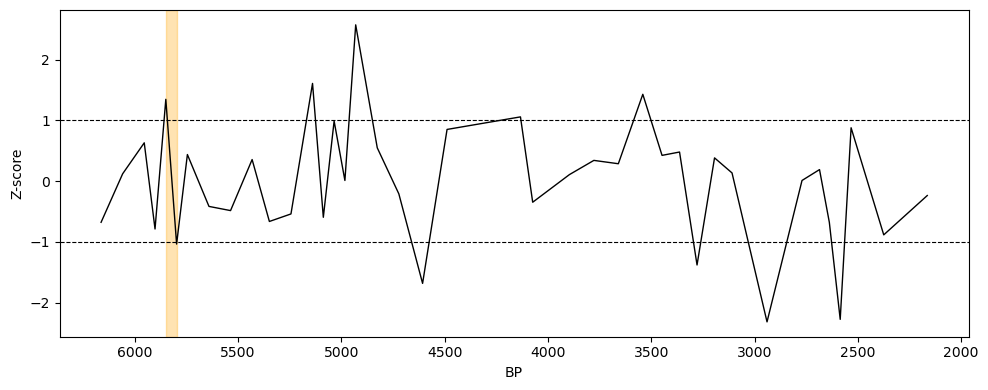

In [16]:
# 5.2.1 Detecting long-term climate stress which Z-scores exceeded ±1.0 for at least two consecutive bins (relaxed magnitide): southen Japan

import pandas as pd
import numpy as np
np. random.seed(42)

def detect_stress_clusters_signed(series, threshold, min_duration=2, direction="both"):
    if direction == "positive":
        flags = series >= threshold
    elif direction == "negative":
        flags = series <= -threshold
    else:  # both
        flags = series.abs() >= threshold

    group_id = 1
    group_list = [0] * len(series)
    count = 0
    start_idx = None

    for i, flag in enumerate(flags):
        if flag:
            if count == 0:
                start_idx = i
            count += 1
        else:
            if count >= min_duration:
                for j in range(start_idx, i):
                    group_list[j] = group_id
                group_id += 1
            count = 0
            start_idx = None

    # Last cluster
    if count >= min_duration:
        for j in range(start_idx, len(series)):
            group_list[j] = group_id

    return pd.Series(group_list, index=series.index)

df["cluster_pos_1.5"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.5, min_duration=2, direction="positive")
df["cluster_neg_1.5"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.5, min_duration=2, direction="negative")
df["cluster_all_1.5"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.5, min_duration=2, direction="both")

df["cluster_pos_1.0"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.0, min_duration=2, direction="positive")
df["cluster_neg_1.0"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.0, min_duration=2, direction="negative")
df["cluster_all_1.0"] = detect_stress_clusters_signed(df["resid_z"], threshold=1.0, min_duration=2, direction="both")

print("▶ cluster_all_1.0 distibution:\n", df["cluster_all_1.0"].value_counts())
print("▶ ΔZ ≥ ±1.0 & duration ≥ 2 cluster:")
print(df[df["cluster_all_1.0"] > 0][["BP", "resid_z", "cluster_all_1.0"]])

import os

# Creating Output packages
os.makedirs("output/tables", exist_ok=True)

# Saving cluster_all_1.0 > 0
df[df["cluster_all_1.0"] > 0][["BP", "Temp", "resid_z", "cluster_all_1.0"]].to_csv(
    "output/tables/climate_stress_clusters_1.0_japan.csv",
    index=False,
    encoding="utf-8-sig"
)

import matplotlib.pyplot as plt

# Creating visualization directory
os.makedirs("output/figures", exist_ok=True)

# Plots
plt.figure(figsize=(10, 4))
plt.plot(df["BP"], df["resid_z"], color="black", linewidth=1)
plt.axhline(1.0, linestyle="--", color="black", linewidth=0.8)
plt.axhline(-1.0, linestyle="--", color="black", linewidth=0.8)

# Emphasizing cluster areas
for cid in df["cluster_all_1.0"].unique():
    if cid > 0:
        seg = df[df["cluster_all_1.0"] == cid]
        plt.axvspan(seg["BP"].max(), seg["BP"].min(), color="orange", alpha=0.3)

# Setting axis limits
plt.gca().invert_xaxis()
plt.xlabel("BP")
plt.ylabel("Z-score")
plt.tight_layout()

# Saving plots
plt.savefig("output/figures/fig_s7_zscore_stress_clusters_1.0_japan.png", dpi=300)
plt.savefig("output/figures/fig_s7_zscore_stress_clusters_1.0_japan.eps", format="eps")
plt.show()


Residual Z-score series of Holocene summer temperature for KY07-04-01core (BP 6163–2164). 
A band marks the only detected long-term climate stress cluster, defined by Z ranging from –1.03 to +1.34 over two consecutive bins (duration ≥ 2).

### 5.2.2 Detecting Short-Term Shock Detection via ΔZ : southen Japan
- Compute Δresiduals: the first-difference of temperature residuals.
- Standardize Δresiduals to Z-scores.
- Identify "short-term shock" spots where ΔZ Z-score exceeds ±1.5.
- Save significant spots as `table_spot_delta_residz.csv`.
- Visualize time series of Δresidual Z with highlighted shock points.

[Shapiro-Wilk] W = 0.9633, p = 0.2296
[D’Agostino K²] stat = 3.1700, p = 0.2049


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


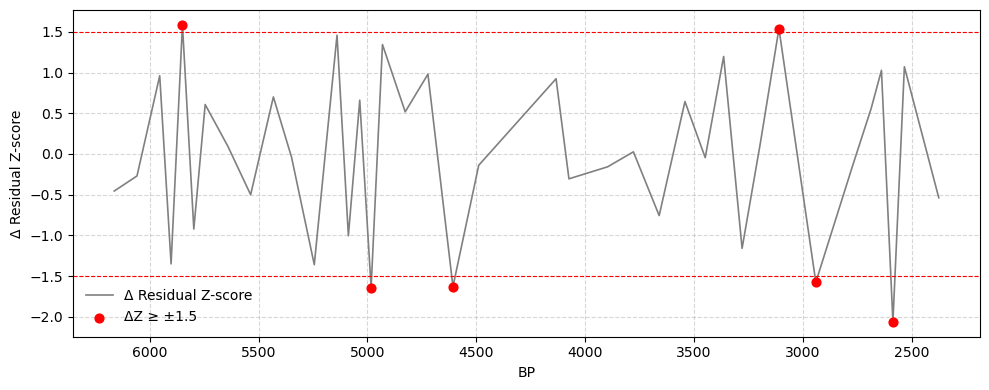

In [18]:
import pandas as pd
np. random.seed(42)
import matplotlib.pyplot as plt
import os
from scipy.stats import shapiro, normaltest
np.random.seed(42)

# Setting path 
INPUT_PATH = "output/tables/table1_residual_zscore_japan.csv"
OUTPUT_TABLE_SPOT = "output/tables/table_spot_delta_residz_japan.csv"
OUTPUT_TABLE_FULL = "output/tables/table2_residual_dz_zscore_japan.csv"
OUTPUT_FIG_PNG = "output/figures/fig_s8_spot_delta_residz_japan.png"
OUTPUT_FIG_EPS = "output/figures/fig_s8_spot_delta_residz_japan.eps"

# Loading and sorting data
df = pd.read_csv(INPUT_PATH)
df = df.sort_values("BP", ascending=True).reset_index(drop=True)

# Caculating Δresiduals 
df["delta_residz"] = df["resid_z"].diff()

# Checking the normality of Δresiduals
delta_residz_clean = df["delta_residz"].dropna()

# Shapiro-Wilk
shapiro_stat, shapiro_p = shapiro(delta_residz_clean)

# D’Agostino K²
dagostino_stat, dagostino_p = normaltest(delta_residz_clean)

print(f"[Shapiro-Wilk] W = {shapiro_stat:.4f}, p = {shapiro_p:.4f}")
print(f"[D’Agostino K²] stat = {dagostino_stat:.4f}, p = {dagostino_p:.4f}")

# Transformating Δresiduals into Z-score
mu = delta_residz_clean.mean()
sigma = delta_residz_clean.std()
df["delta_zscore"] = (df["delta_residz"] - mu) / sigma

# Extracting spots where exceeding Δresidual Z exceeds ±1.5
THRESHOLD = 1.5
df_spot = df[df["delta_zscore"].abs() >= THRESHOLD]
df_spot.to_csv(OUTPUT_TABLE_SPOT, index=False, encoding="utf-8-sig")

# Soring in descending order and Saving all
df_desc = df.sort_values("BP", ascending=False).reset_index(drop=True)
df_desc.to_csv(OUTPUT_TABLE_FULL, index=False, encoding="utf-8-sig")

# Visualizing
plt.figure(figsize=(10, 4))
plt.plot(df["BP"], df["delta_zscore"], color="gray", linewidth=1.2, label="Δ Residual Z-score")
plt.scatter(df_spot["BP"], df_spot["delta_zscore"], color="red", s=40, zorder=5, label="ΔZ ≥ ±1.5")
plt.axhline(THRESHOLD, linestyle="--", color="red", linewidth=0.8)
plt.axhline(-THRESHOLD, linestyle="--", color="red", linewidth=0.8)
plt.xlabel("BP")
plt.ylabel("Δ Residual Z-score")
plt.gca().invert_xaxis()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.legend(frameon=False)

# Saving plots
os.makedirs("output/figures", exist_ok=True)
plt.savefig(OUTPUT_FIG_PNG, dpi=300)
plt.savefig(OUTPUT_FIG_EPS, format="eps", dpi=300)
plt.show()


Z-standardized first differences of the residual temperature series (Δ Residual Z) for southern Japan . 
Dots indicate shock points where Δ Residual Z-score exceeds ±1.5, reflecting potential rapid climatic 

### 5.2.3 Generating SPD Data and Processing : southen Japan

- Load uncalibrated radiocarbon data from `raw_spd_japan.csv`.
- Parse central BP and error margins.
- Perform SPD simulation with 1000 iterations using kernel density estimation (KDE).
- Bin to 20-year intervals and normalize.
- Present the standardized SPD_Z and its 3-bin centered moving average (SPD_M3), smoothed at approximately 60-year intervals
- Save SPD output as `spd_japan_20yr.csv`, `spd_japan_z_m3.csv`

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


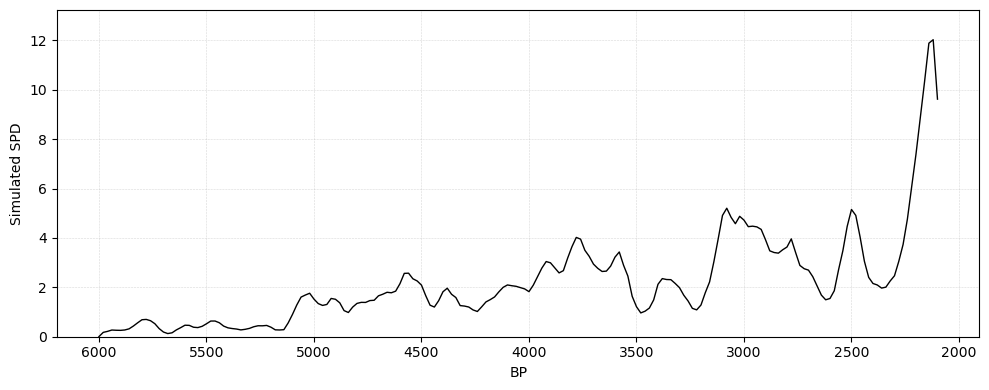

Extracting the number of valid samples: 441


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Setting path
DATA_PATH = "data/raw/raw_spd_japan.csv"
OUTPUT_PATH_CSV = "data/processed/spd_japan_20yr.csv"
OUTPUT_PATH_PNG = "output/figures/fig_s9_spd_japan.png"
OUTPUT_PATH_EPS = "output/figures/fig_s9_spd_japan.eps"

# Setting
FILE_PATH = "data/raw/raw_spd_japan.csv"
OUTPUT_PATH = "data/processed/spd_japan_20yr.csv"
BIN_WIDTH = 20
BP_MIN, BP_MAX = 2100, 6000
N_SIM = 1000

# Loading data
df = pd.read_csv(FILE_PATH, encoding='ISO-8859-1',low_memory=False)
df['CRA'] = pd.to_numeric(df['CRA'], errors='coerce')
df['CRAError'] = pd.to_numeric(df['CRAError'], errors='coerce')
df['Latitude'] = pd.to_numeric(df['Latitude'], errors='coerce')
df['Longitude'] = pd.to_numeric(df['Longitude'], errors='coerce')

# Filtering by CPA range
df = df[(df['CRA'] >= BP_MIN) & (df['CRA'] <= BP_MAX)]

# upplement missing Latitude and Longitude based on SiteNameEn lookup table
coord_lookup = df.dropna(subset=['Latitude', 'Longitude']) \
    .groupby('SiteNameEn')[['Latitude', 'Longitude']].first()

df[['Latitude', 'Longitude']] = df.apply(
    lambda row: coord_lookup.loc[row['SiteNameEn']]
    if pd.isna(row['Latitude']) and row['SiteNameEn'] in coord_lookup.index
    else row[['Latitude', 'Longitude']],
    axis=1, result_type='expand'
)

# Removing missing values in the Latitude column 
df = df.dropna(subset=['Latitude', 'CRA', 'CRAError'])
df = df[(df['Latitude'] >= 29.0) & (df['Latitude'] <= 32.0)]

# Calculating SPD(Performing probabilistic simulations, generating annual time series)
years = np.arange(BP_MIN, BP_MAX + 1)
spd_accum = np.zeros_like(years, dtype=float)

for _ in range(N_SIM):
    simulated_dates = np.random.normal(loc=df['CRA'], scale=df['CRAError'])
    counts, _ = np.histogram(simulated_dates, bins=np.append(years, BP_MAX + 1))
    spd_accum += counts

spd_mean = spd_accum / N_SIM

# Aggregating annual results into 20-year bins
df_spd = pd.DataFrame({'BP': years, 'SPD': spd_mean})
df_spd['CRA_bin'] = (df_spd['BP'] // BIN_WIDTH) * BIN_WIDTH
spd_bin = df_spd.groupby('CRA_bin')['SPD'].sum().reset_index()
spd_bin = spd_bin.sort_values(by='CRA_bin', ascending=False)

# Saving
os.makedirs(os.path.dirname(OUTPUT_PATH), exist_ok=True)
spd_bin.to_csv(OUTPUT_PATH, index=False, encoding='utf-8-sig')

# visualizing
plt.figure(figsize=(10, 4))
plt.plot(spd_bin['CRA_bin'], spd_bin['SPD'], color='black', linewidth=1)
plt.xlabel("BP")
plt.ylabel("Simulated SPD")
plt.ylim(0, spd_bin['SPD'].max() * 1.1)  # Y axis
plt.grid(True, linestyle='--', alpha=0.5, linewidth=0.4)
plt.gca().invert_xaxis()
plt.tight_layout()
plt.savefig(OUTPUT_PATH_PNG, dpi=300)
plt.savefig(OUTPUT_PATH_EPS, format='eps', dpi=300)
plt.show()



N_SIM = 1000
BIN_WIDTH = 20
YEAR_MIN, YEAR_MAX = 2100, 6000  
print(f"Extracting the number of valid samples: {len(df)}")


Raw SPD for southern Japan (29°–32°N; BP 6100–2100), based on 1,000 Monte Carlo simulations of CRA dates with standard errors. 
Data are binned at 20-year intervals and limited to sites near the KY07-04-01 core region. 
A gradual rise begins after BP 5000, accelerating after BP 3000, with a peak (~12.0) near BP 2100, indicating late-phase demographic concentration.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


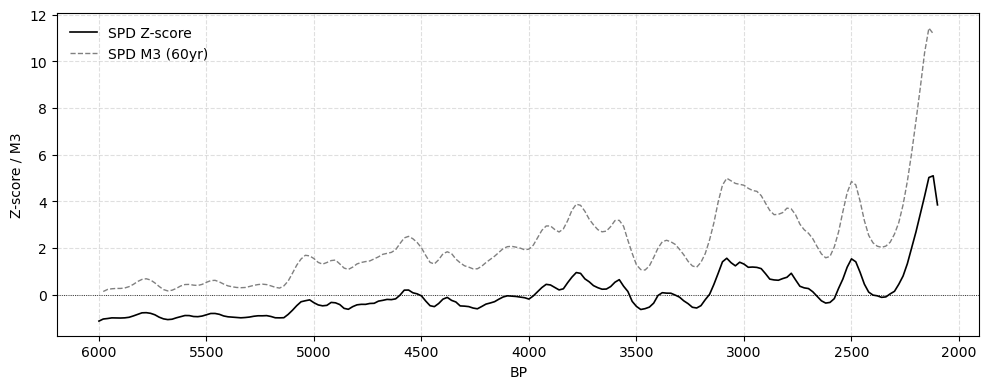

In [21]:
import pandas as pd
np.random.seed(42)
import matplotlib.pyplot as plt
import os

# Preventing EPS save errors
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

# Setting path
INPUT_PATH = "data/processed/spd_japan_20yr.csv"
OUTPUT_CSV = "data/processed/spd_japan_z_m3.csv"
OUTPUT_PNG = "output/figures/fig_s10_spd_japan_z_m3.png"
OUTPUT_EPS = "output/figures/fig_s10_spd_japan_z_m3.eps"

# Loading data
df = pd.read_csv(INPUT_PATH)
df = df.sort_values("CRA_bin", ascending=False).reset_index(drop=True)

# Transforming SPD into SPD Z-score 
df["SPD_Z"] = (df["SPD"] - df["SPD"].mean()) / df["SPD"].std()

# Moving average M3 (3 bin = 60 years)
df["SPD_M3"] = df["SPD"].rolling(window=3, center=True).mean()

# Saving
os.makedirs(os.path.dirname(OUTPUT_PNG), exist_ok=True)
os.makedirs(os.path.dirname(OUTPUT_EPS), exist_ok=True)
df.to_csv(OUTPUT_CSV, index=False, encoding="utf-8-sig")

# Visualizing
plt.figure(figsize=(10, 4))
plt.plot(df["CRA_bin"], df["SPD_Z"], color="black", linewidth=1.2, label="SPD Z-score")
plt.plot(df["CRA_bin"], df["SPD_M3"], color="gray", linewidth=1.0, linestyle="--", label="SPD M3 (60yr)")
plt.axhline(0, color="black", linestyle=":", linewidth=0.6)
plt.xlabel("BP")
plt.ylabel("Z-score / M3")
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(frameon=False)
plt.gca().invert_xaxis()
plt.tight_layout()

# Saving plots
plt.savefig(OUTPUT_PNG, dpi=300)
plt.savefig(OUTPUT_EPS, format='eps', dpi=300)
plt.show()


Standardized SPD Z-score and 3-bin moving average (M3) for southern Japan (29°–32°N). 
The Z-score series (black) indicates relative settlement intensity, and the M3 curve (grey dashed) highlights mid-term trends. 
A sustained rise begins after BP 3000, peaking around BP 2100 (~+5.6), reflecting late-Holocene demographic expansion.

### 5.1.4 OverlayIing Climate Stress and SPD in southe Japan
- Combine SPD Z-score series with climate stress diagnostics:
- Long-term stress bands (±1.0 Z, duration ≥ 2)
- Short-term ΔZ Z-score line and spots (±1.5 threshold)
- overlay climate stress and SPD_Z

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


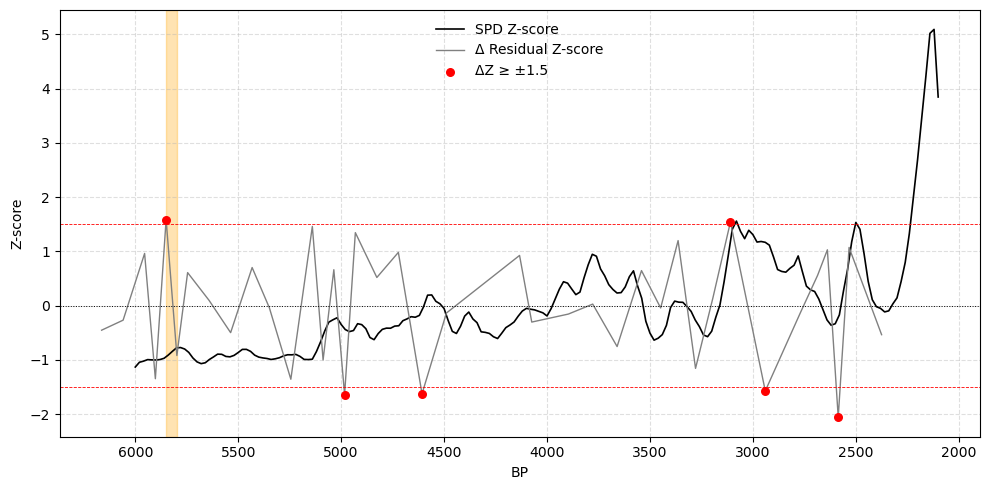

In [22]:
import pandas as pd
np.random.seed(42)
import matplotlib.pyplot as plt
import os

# Setting Path
SPD_PATH = "data/processed/spd_japan_z_m3.csv"
CLUSTER_PATH = "output/tables/climate_stress_clusters_1.0_japan.csv"
DZ_PATH = "output/tables/table2_residual_dz_zscore_japan.csv"
OUTPUT_TABLE_SPOT = "output/tables/table_spot_delta_residz_japan.csv"
FIG_PATH_PNG = "output/figures/fig4_spd_z_climate_overlay_japan.png"
FIG_PATH_EPS = "output/figures/fig4_spd_z_climate_overlay_japan.eps"

# Loading data
df_spd = pd.read_csv(SPD_PATH)
df_clust = pd.read_csv(CLUSTER_PATH)
df_dz = pd.read_csv(DZ_PATH)

# # Sorting in descending order
df_spd = df_spd.sort_values("CRA_bin", ascending=False)
df_clust = df_clust.sort_values("BP", ascending=False)
df_dz = df_dz.sort_values("BP", ascending=False)

# Visualizing
plt.figure(figsize=(10, 5))

# SPD Z-score (Solid black line)
plt.plot(df_spd["CRA_bin"], df_spd["SPD_Z"], color="black", linewidth=1.2, label="SPD Z-score")

# Δresidual Z-score (solid grey line)
plt.plot(df_dz["BP"], df_dz["delta_zscore"], color="gray", linewidth=1.0, label="Δ Residual Z-score")

# ΔZ ≥ ±1.5 spots (red dots)
df_spot = df_dz[df_dz["delta_zscore"].abs() >= 1.5]
plt.scatter(df_spot["BP"], df_spot["delta_zscore"], color="red", s=30, zorder=5, label="ΔZ ≥ ±1.5")

# long-term stress(oragne band)
for cid in df_clust["cluster_all_1.0"].dropna().unique():
    if cid > 0:
        seg = df_clust[df_clust["cluster_all_1.0"] == cid]
        plt.axvspan(seg["BP"].max(), seg["BP"].min(), color="orange", alpha=0.3)

# Summarizing plot style
plt.axhline(0, linestyle=":", color="black", linewidth=0.7)
plt.axhline(1.5, linestyle="--", color="red", linewidth=0.6)
plt.axhline(-1.5, linestyle="--", color="red", linewidth=0.6)
plt.xlabel("BP")
plt.ylabel("Z-score")
plt.gca().invert_xaxis()
plt.grid(True, linestyle="--", alpha=0.4)
plt.legend(frameon=False)
plt.tight_layout()

# Saving
os.makedirs("output/figures", exist_ok=True)
plt.savefig(FIG_PATH_PNG, dpi=300)
plt.savefig(FIG_PATH_EPS, format="eps", dpi=300)
plt.show()


Southern Japan: SPD_Z (black), Δ residual Z (grey), short-term shocks (dots, |ΔZ| ≥ 1.5), long-term stress (band, Z ≥ ±1.0 for ≥2 bins). SPD_Z: 20-year bins; climate: 100-year. Some temporal misalignment possible.

### 6.4 Linkage and Causality Analysis Between the korean peninsula and southe Japan 
-the period  from BP 2700 to 2100 when SPD_Z in the Korean Peninsula experienced a sharp decline, aligns temporally with the rise in SPD_Z in southern Japan fromBP 2500 to 2100. 
-To determine whether these patterns reflect mere synchrony or directional structural interdependence, I applied three statistical tests. 
-Spearman rank correlation analysis(zero-lag) 
-Lagged spearman correlation analysis 
-Granger causality tests 

In [18]:
from statsmodels.tsa.stattools import grangercausalitytests

Spearman rank correlation (no lag, SPD_Z)


,Spearman_Correlation,p_value
0,-0.577419,0.000671


Lagged Spearman rank correlation analysis (BP 2700–2100, SPD_Z)


,Lag_Years,SpearmanR,Spearman_p
0,-200,-0.409091,6.555817e-02
1,-180,-0.427442,4.722787e-02
2,-160,-0.480237,2.037880e-02
3,-140,-0.558261,4.581953e-03
4,-120,-0.666923,2.716119e-04
5,-100,-0.746325,1.198843e-05
6,-80,-0.795482,7.087398e-07
7,-60,-0.806787,2.156757e-07
8,-40,-0.762069,1.560969e-06
9,-20,-0.679199,3.678107e-05


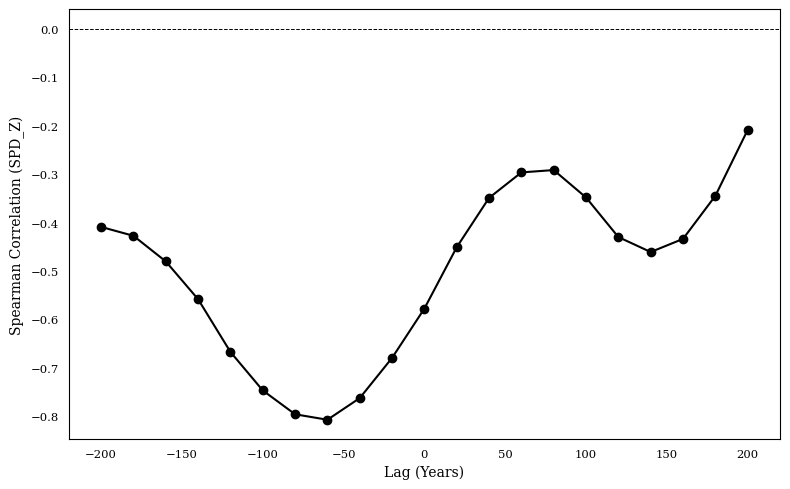

In [23]:
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from scipy.stats import spearmanr
import os

# Setting
%matplotlib inline


# Setting plot style
import seaborn as sns
sns.set_style('white')
plt.rcParams.update({
    'axes.edgecolor': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'axes.labelcolor': 'black',
    'axes.titlesize': 'medium',
    'axes.labelsize': 'medium',
    'xtick.labelsize': 'small',
    'ytick.labelsize': 'small',
    'font.family': 'serif'
})

# Setting output packages
os.makedirs('output/figures', exist_ok=True)
os.makedirs('output/tables', exist_ok=True)

# Loading data
korea_df = pd.read_csv("data/processed/spd_korea_z_m3.csv")[['CRA_bin', 'SPD_Z']]
japan_df = pd.read_csv("data/processed/spd_japan_z_m3.csv")[['CRA_bin', 'SPD_Z']]

# Renaming columns
korea_df.columns = ['CRA_bin', 'SPD_Z_korea']
japan_df.columns = ['CRA_bin', 'SPD_Z_japan']

# Filtering for BP between 2700 and 2100 (inclusive)
filtered = pd.merge(
    korea_df.query("2100 <= CRA_bin <= 2700"),
    japan_df.query("2100 <= CRA_bin <= 2700"),
    on='CRA_bin'
)

# 0-lag Spearman
corr0, p0 = spearmanr(filtered['SPD_Z_korea'], filtered['SPD_Z_japan'])
pd.DataFrame({
    'Spearman_Correlation': [corr0],
    'p_value': [p0]
}).to_csv('output/tables/spearman_results_z_filtered.csv', index=False)
spearman_results_df = pd.DataFrame({
    'Spearman_Correlation': [corr0],
    'p_value': [p0]
})


# Lagged Spearman
results = []
for lag in range(-10, 11):
    if lag < 0:
        x = filtered['SPD_Z_korea'].iloc[:lag]
        y = filtered['SPD_Z_japan'].iloc[-lag:]
    elif lag > 0:
        x = filtered['SPD_Z_korea'].iloc[lag:]
        y = filtered['SPD_Z_japan'].iloc[:-lag]
    else:
        x = filtered['SPD_Z_korea']
        y = filtered['SPD_Z_japan']
    r, p = spearmanr(x, y)
    results.append({'Lag_Years': lag * 20, 'SpearmanR': r, 'Spearman_p': p})

lagged_df = pd.DataFrame(results)
lagged_df.to_csv('output/tables/lagcorrelation_results_z_filtered.csv', index=False)


# Visualizing
plt.figure(figsize=(8, 5))
plt.plot(
    lagged_df['Lag_Years'],
    lagged_df['SpearmanR'],
    marker='o',
    linestyle='-',
    color='black',
    markerfacecolor='black',
    markeredgecolor='black'
)
plt.axhline(0, linestyle='--', linewidth=0.7, color='black')
plt.xlabel('Lag (Years)')
plt.ylabel('Spearman Correlation (SPD_Z)')
plt.tight_layout()

# Displying results
print("Spearman rank correlation (no lag, SPD_Z)")
display(spearman_results_df)
print("Lagged Spearman rank correlation analysis (BP 2700–2100, SPD_Z)")
display(lagged_df)

# Saving plots
plt.savefig('output/figures/fig_s11_lagged_spearman_z_filtered.png', dpi=300)
plt.savefig('output/figures/fig_s11_lagged_spearman_z_filtered.eps', format='eps')
plt.show()

A broad range of statistically significant negative correlations is observed between Korea and Japan from Lag –180 to +20 years (p < 0.05), with the strongest correlation at Lag –60 (ρ = –0.81). 
This suggests that while the leading signal from Korea spans a wide temporal range, the most structured relationship appears when Korea precedes Japan by ~60 years.

,Lag,Direction,p_value
0,1,Korea_to_Japan,0.062612
1,2,Korea_to_Japan,0.373208
2,3,Korea_to_Japan,0.523853
3,4,Korea_to_Japan,0.174960
4,5,Korea_to_Japan,0.087660
5,6,Korea_to_Japan,0.002084
6,7,Korea_to_Japan,0.000223
7,8,Korea_to_Japan,0.006255
8,1,Japan_to_Korea,0.377589
9,2,Japan_to_Korea,0.031751


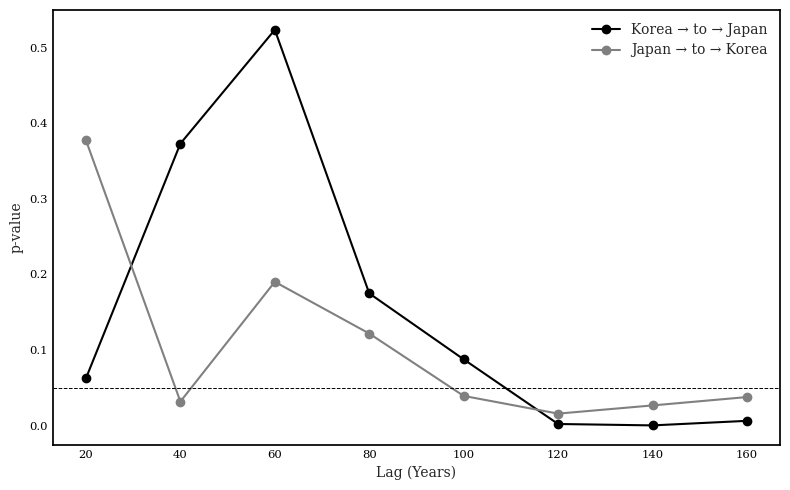

In [24]:
from pathlib import Path
import pandas as pd
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="statsmodels.tsa.stattools")

# Setting
project_dir   = Path().resolve()
data_dir      = project_dir/"data"/"processed"
out_tab       = project_dir/"output"/"tables"
out_fig       = project_dir/"output"/"figures"
out_tab.mkdir(parents=True, exist_ok=True)
out_fig.mkdir(parents=True, exist_ok=True)

# Loading and merging data
k = pd.read_csv(data_dir/"spd_korea_z_m3.csv")[['CRA_bin','SPD_Z']].rename(columns={'SPD_Z':'SPD_Z_korea'})
j = pd.read_csv(data_dir/"spd_japan_z_m3.csv")[['CRA_bin','SPD_Z']].rename(columns={'SPD_Z':'SPD_Z_japan'})
df = (pd.merge(k, j, on='CRA_bin')
      .query('2100 <= CRA_bin <= 2700')
      .sort_values('CRA_bin')
      .reset_index(drop=True))

# Granger Casuality test (maxlag : 8)
maxlag = 8
results = []
for direction,(src,tgt) in {
    'Korea_to_Japan':('SPD_Z_korea','SPD_Z_japan'),
    'Japan_to_Korea':('SPD_Z_japan','SPD_Z_korea')
}.items():
    gc = grangercausalitytests(df[[src,tgt]], maxlag=maxlag, verbose=False)
    for lag in range(1, maxlag+1):
        p = gc[lag][0]['ssr_ftest'][1]
        results.append({'Lag': lag, 'Direction': direction, 'p_value': p})

gr_df = pd.DataFrame(results)
gr_df.to_csv(out_tab/"granger_results_z_bidirectional.csv", index=False)

# inline table
from IPython.display import display
display(gr_df)

# Setting plot style
plt.style.use('seaborn-v0_8-white')
plt.rcParams['axes.grid'] = False
plt.rcParams.update({
    'axes.edgecolor':'black','xtick.color':'black','ytick.color':'black',
    'font.family':'serif'
})

plt.figure(figsize=(8,5))
colors = {'Korea_to_Japan':'black','Japan_to_Korea':'gray'}
for d in colors:
    sub = gr_df[gr_df.Direction==d]
    plt.plot(sub.Lag*20, sub.p_value,
             marker='o', linestyle='-',
             color=colors[d],
             label=d.replace('_',' → '))

plt.axhline(0.05, linestyle='--', linewidth=0.7, color='black')
plt.xlabel('Lag (Years)')
plt.ylabel('p-value')
plt.legend(frameon=False)
plt.tight_layout()

# Saving plots
plt.savefig(out_fig/"fig_s12_granger_bidirectional_spd_z.png", dpi=300)
plt.savefig(out_fig/"fig_s12_granger_bidirectional_spd_z.eps", format='eps')
plt.show()

Granger causality tests indicate significant but asymmetric temporal influence, with delayed predictability from Korea to Japan and earlier signals in the opposite direction.